# Exercise Sheet 1: Neurons

In [1]:
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt

## Task 1: The logistic function (1 point - programming)
Write a function "logistic(h,a=1)" resembling the logistic function and a second function "signtrafunc" the binary (sign-based) tranfer function. Also write a function "dlogistic(h,a=1)" resembling the derivative of the logistic function. Similarly, write a "gaussRBF(h,a=1)" resembling the gaussian Radial Basis Function and "dgaussRBF(h,a=1)" its derivative.

Plot each of them in the range of -10 to 10 together with their derivative (except for the sign-based function) with  matplotlibs plot function (plt.plot)).

For defining the sign-based transfer function the inline definition of functions using the syntax trafunc=lambda x: f(x) might be handy, please write the logistic function, however, as a classical function definition. The a=1 in the function definition sets the default to a=1 so the function needs only 1 argument by default.

In [2]:
def logistic(h,a=1):
    y = 1 / (1 + np.exp(-1 * a * h))
    return y

signtrafunc=lambda x:(np.sign(x) + 1)/2


def dlogistic(h,a=1):
    y = logistic(h,a=1)
    dy = y * (1-y)
    return dy

def gaussRBF(h, a=1):
    y = np.exp(-1 * np.square(a * h))
    return y

def dgaussRBF(h, a=1):
    y = gaussRBF(h, a=1)
    dy = y * (-2 * a * h)
    return dy

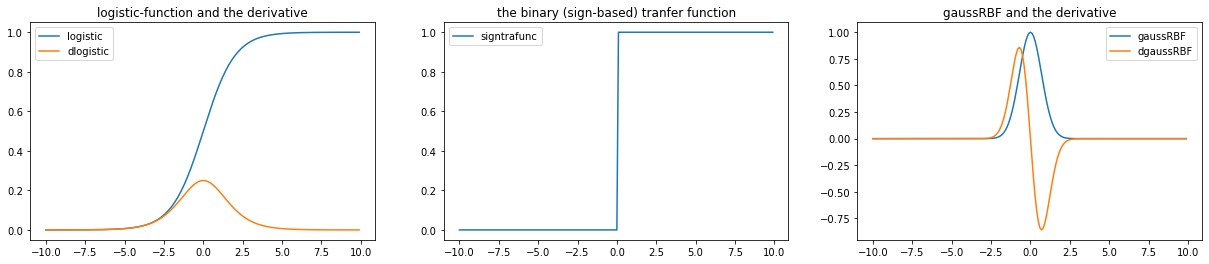

In [3]:
# the range x and the functions
x = np.arange(-10, 10, 0.1)
y_log = logistic(x)
y_dlog = dlogistic(x)
y_sign = signtrafunc(x)
y_rbf = gaussRBF(x)
y_drbf = dgaussRBF(x)

# figures
plt.figure(figsize=(21,4))

# the first subplot for functions: log and dlog
plt.subplot(131)
plt.title('logistic-function and the derivative')
plt.plot(x,y_log,label="logistic")
plt.plot(x,y_dlog,label="dlogistic")
plt.legend()

# the second subplot for function: sign
plt.subplot(132)
plt.title('the binary (sign-based) tranfer function')
plt.plot(x,y_sign,label="signtrafunc")
plt.legend()

# the third subplot for functions: rbf and drbf
plt.subplot(133)
plt.title('gaussRBF and the derivative')
plt.plot(x,y_rbf,label="gaussRBF")
plt.plot(x,y_drbf,label="dgaussRBF")
plt.legend()

plt.show()

## Task 2: Building an artificial neuron  (2 points - programming)
Define a class "neuron" resembling a simple perceptron. See https://docs.python.org/3/tutorial/classes.html for help on classes.

It should have the attributes "neuron.w" for the weights, "neuron.b" for the bias, the methods "neuron.trafunc(self,h)" for the transfer function, "neuron.dtrafunc(self,h)"  for the first derivative of the transfer function and the method "neuron.out(self,x)" to calculate the output for inputs *x* and *h* respectively. 

Build a constructor method "\__init\__(self,...)", where self refers to the object itself, which assigns the weight vector *x*, the bias *b* , the transfer function "trafunc" and it's derivative "dtrafunc" to the neuron.

The transfer function and its derivative should best be assigned at construction in order to acccount for different possible transfer functions.

In [4]:
class neuron:
    def __init__(self, weight, bias, trafunc = lambda x:0, dtrafunc = lambda x:0):
        # initial the neuron with weight, bias and different possible transfer functions
        # two functions have default values as f(x) = 0, just in case of some problems. 
        # such as signtrafunc, which has not a dfunction
        self.w = weight
        self.b = bias
        self.trafunc = trafunc
        self.dtrafunc = dtrafunc
    
    def trafunc(self,h):
        return self.trafunc(h)
        
    def dtrafunc(self,h):
        return self.dtrafunc(h)
    
    def out(self, x):
        # out = f(w*x-b)
        return self.trafunc(np.dot(self.w,x)-self.b)

#### Testing

In [5]:
weight = np.array([10,-5,5,10])
x = np.array([-1,-2,-4,3])
bias = 10
n = neuron(weight, bias, trafunc = logistic, dtrafunc = dlogistic)
n.out(x)

0.5

## Task 3: Use an artificial neuron (3 points - thinking and programming)
Use instances of the neuron class above to build the equivalents to logical "or" and "and"-functions using the binary (sign-based) transfer function and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0] [1,0], [0,1], [1,1]) by setting the weights and bias manually.

First, use the sign-based transfer function to solve the task with exact solution and then apply the same weights w and bias b on a neuron with the logistic and gaussian RBF transfer functions.

What's the difference?

*Hint: if you haven't succeeded with Task 2, you can solve Task 3 analytically and write down the needed weights and results.*

#### OR function

In [6]:
x = np.array([[0,0], [1,0], [0,1], [1,1]])

w = np.array([2,2])
b = 1

# in our case: w*x-b = [-1,1,1,3]

neuron1 = neuron(w, b, trafunc = signtrafunc)
print("OR function: ", neuron1.out(x.T))

neuron2 = neuron(w, b, trafunc = logistic, dtrafunc = dlogistic)
print("with logistic: ", neuron2.out(x.T))

neuron3 = neuron(w, b, trafunc = gaussRBF, dtrafunc = dgaussRBF)
print("with gaussRBF: ", neuron3.out(x.T))

OR function:  [0. 1. 1. 1.]
with logistic:  [0.26894142 0.73105858 0.73105858 0.95257413]
with gaussRBF:  [3.67879441e-01 3.67879441e-01 3.67879441e-01 1.23409804e-04]


#### AND function

In [7]:
x = np.array([[0,0], [1,0], [0,1], [1,1]])

w = np.array([2,2])
b = 3

# in our case: w*x-b = [-3,-1,-1,1]

neuron1 = neuron(w, b, trafunc = signtrafunc)
print("AND function: ", neuron1.out(x.T))

neuron2 = neuron(w, b, trafunc = logistic, dtrafunc = dlogistic)
print("with logistic: ", neuron2.out(x.T))

neuron3 = neuron(w, b, trafunc = gaussRBF, dtrafunc = dgaussRBF)
print("with gaussRBF: ", neuron3.out(x.T))

AND function:  [0. 0. 0. 1.]
with logistic:  [0.04742587 0.26894142 0.26894142 0.73105858]
with gaussRBF:  [1.23409804e-04 3.67879441e-01 3.67879441e-01 3.67879441e-01]


##### difference:
Sign-based function transfers the input into a binary answer (1/0/(0.5)). For the same input, the operating of logistic function can be understood as the probability, and has an irreversible mapping with the sign-based function, which is (<0.5) to 0 and (>0.5) to 1. The gaussian funtion has a continuous value from 0 to 1 and to 0 again, which is extremely different from the sign-based and logistic.

## Task 4: The electrical field strength (4 points - analytic derivation)
Analytically derive the electrical field strength $\vec{E}=-\nabla\phi$ of an electrostatic dipole field at origin in an inifinite homogeneous otherwise charge-free space step-by-step from the potential equation $\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^3}$ in Cartesian coordinates.

To this extent you will need to build the gradient $\nabla=\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)$!

You can take the dipolar moment $\vec{p}$ to be a constant vector $\vec{p}=\left(
\begin{array}{c}
	p_x\\
	p_y\\
	p_z
\end{array}
\right)$. 

The vector $\vec{r}=\left(
\begin{array}{c}
	x\\
	y\\
	z
\end{array}
\right)$ is the coordinates in cartesian coordinates and  the norm is the euclidean norm $\left|\vec{r}\right|=\sqrt{x^2+y^2+z^2}$.

*Hint: You can hand in the solution in your format of choice: Write direclty below (Markdown takes latex within $$, jsut double-click on the cell below), Pdf from Latex or Word, scan or photo of a hand-written derivation, etc....*

### Solution:
$\vec{E}=- \nabla \phi= - \nabla \left( \frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^3}\right) = - \nabla \left( \frac{1}{4\pi\epsilon_0}\frac{p_x \cdot x + p_y \cdot y + p_z \cdot z}{(x^2 + y^2 + z^2 )^ {\frac{3}{2}}}\right) \\
= - \left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)\left( \frac{1}{4\pi\epsilon_0}\frac{p_x \cdot x + p_y \cdot y + p_z \cdot z}{(x^2 + y^2 + z^2 )^ {\frac{3}{2}}}\right) \\= - \frac{1}{4\pi\epsilon_0} \left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)\left( \frac{p_x \cdot x + p_y \cdot y + p_z \cdot z}{(x^2 + y^2 + z^2 )^ {\frac{3}{2}}}\right) $


$\frac{\delta}{\delta x}\left( \frac{p_x \cdot x + p_y \cdot y + p_z \cdot z}{(x^2 + y^2 + z^2 )^ {\frac{3}{2}}}\right) = \frac{\delta}{\delta x}\left( (p_x \cdot x + p_y \cdot y + p_z \cdot z)\cdot (x^2 + y^2 + z^2 )^ {-\frac{3}{2}} \right)\\ = 
(p_x \cdot x + p_y \cdot y + p_z \cdot z)' \cdot (x^2 + y^2 + z^2 )^ {-\frac{3}{2}} + (p_x \cdot x + p_y \cdot y + p_z \cdot z) \cdot ((x^2 + y^2 + z^2 )^ {-\frac{3}{2}})'\\
=p_x \cdot \left|\vec{r}\right|^{-3} + (\vec{p} \cdot \vec{r}) \cdot f'(g(x)) \cdot g'(x) \qquad with \quad g(x)=x^2+y^2+z^2, f(u)=u^{-\frac{3}{2}} \\
= p_x \cdot \left|\vec{r}\right|^{-3} + (\vec{p} \cdot \vec{r}) \cdot ( -\frac{3}{2}(x^2+y^2+z^2)^{-\frac{5}{2}} \cdot 2x)\\
= p_x \cdot \left|\vec{r}\right|^{-3} + (\vec{p} \cdot \vec{r}) \cdot ( -3 \left|\vec{r}\right|^{-5} \cdot x)\\
= p_x \cdot \left|\vec{r}\right|^{-3} - 3 \cdot \vec{p} \cdot \vec{r} \cdot x \cdot \left|\vec{r}\right|^{-5}
$

the same for $\frac{\delta}{\delta y}$ and $\frac{\delta}{\delta z}$

so

$\vec{E}=- \nabla \phi= - \frac{1}{4\pi\epsilon_0} \left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)\left( \frac{p_x \cdot x + p_y \cdot y + p_z \cdot z}{(x^2 + y^2 + z^2 )^ {\frac{3}{2}}}\right)
= - \frac{1}{4\pi\epsilon_0}
\left(
\begin{array}{c}
	p_x \cdot \left|\vec{r}\right|^{-3} - 3 \cdot \vec{p} \cdot \vec{r} \cdot x \cdot \left|\vec{r}\right|^{-5}\\
	p_y \cdot \left|\vec{r}\right|^{-3} - 3 \cdot \vec{p} \cdot \vec{r} \cdot y \cdot \left|\vec{r}\right|^{-5}\\
	p_z \cdot \left|\vec{r}\right|^{-3} - 3 \cdot \vec{p} \cdot \vec{r} \cdot z \cdot \left|\vec{r}\right|^{-5}
\end{array} \right) \\
= - \frac{1}{4\pi\epsilon_0} ({ \vec{p}\cdot \left|\vec{r}\right|^{-3} - 3 \cdot \vec{p} \cdot \vec{r} \cdot \vec{r} \cdot \left|\vec{r}\right|^{-5}}) \\
= \frac{1}{4\pi\epsilon_0} ( 3\frac{\vec{p} \cdot \vec{r}}{\left|\vec{r}\right|^{5}}\cdot \vec{r} - \frac{\vec{p}}{\left|\vec{r}\right|^{3}}) $


## Task 5: Current density & potential of a single PSP (5 points - programming)
Write a python function resembling the electrical field potential $\phi(\vec{r},\vec{r}_q)$ and another one for the current density $\vec{J}$ of a current dipole in infinite homogeneous conductive space at point $\vec{r}_q$ in Cartesian coordinates. The function should take the position of the observed point $\vec{r}$, the position of the dipole $\vec{r}_q$, the current density produced by the source  $\vec{Q}$ and the conductivity $\sigma$ as inputs and return the resulting scalar potential/the current density of the volumce conduction, respectively.  $\vec{r}_q$ should be set to the origin by default. 

$\phi(\vec{r})=\frac{1}{4\pi\sigma}\frac{\vec{Q}\cdot\left(\vec{r}-\vec{r}_q\right)}{\left|\vec{r}-\vec{r}_q\right|^3}$

$\vec{J}=\frac{1}{4 \pi } \left(3 \frac{\left(\vec{r}-\vec{r}_q\right) \cdot \vec{Q}}{\left|\vec{r}-\vec{r}_q\right|^5} \cdot \left(\vec{r}-\vec{r}_q\right)-\frac{\vec{Q}}{\left|\vec{r}-\vec{r}_q\right|^3}\right)$

$\sigma$ is the specific conductivity of the material (a constant) and $\vec{Q}$ is the current density at the source (neuron). For brain tissue, the conductivity is around $\sigma=0.33\frac{S}{m}$.

Make a plot of the two variables in two dimensions from -10cm to 10cm for both axes in the x/y-plane for a dipole at origin with dipole moment $\vec{Q}=[20,0]fAm$.
Plot the potential using the matlpotlib function plt.contour for plotting and the current density using the function plt.streamplot. Draw both plots into the same figure.

Hints: 
- Numpy's tensordot might simplify the treatment of multiple positions at once.
- The arguments to the plot function call for $\vec{J}$- and $\phi$- values need the shape corresponding to the XX and YY variables from np.meshgrid.
- Increase the number of contours in plt.contour to get a nicer distribution of isopotential lines or better use a logarithmic scaling
- you may use contourf to add colors



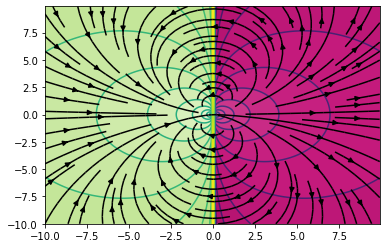

In [8]:
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt

#initialize the variables (x and y in cm, p as a unit dipole with 1Cmm)
x=np.arange(-10,10,0.1) # shape 200，
y=np.arange(-10,10,0.1) # shape 200，
r_0=[0,0]
Q=np.array([20,0])*1e-15;

#create the meshgrid for calculation and plotting (in SI --> m)
XX,YY=np.meshgrid(x/100,y/100) # XX.T = YY each in shape 200,200

def phi_dip(r, q, r_q = [0,0]): # defalut r_q is (0,0)
    r = np.array(r) # shape 2,200,200
    q = np.array(q) # shape 2,
    r_q = np.array(r_q) # shape 2,
    r = (r.T - r_q).T # shape (200,200,2).T = 2,200,200
    sigma = 0.33
    a = np.tensordot(q, r , axes = 1) # shape 200,200
    b = np.power(np.linalg.norm(r,axis=0),3) # shape 200,200
    phi_value = 1 / (4 * np.pi * sigma) *  a / b
    return phi_value # shape 200,200

def J_dip(r, q, r_q = [0,0]):
    r = np.array(r) # shape 2,200,200
    q = np.array(q) # shape 2
    r_q = np.array(r_q) # shape 2
    r = (r.T - r_q).T # shape (200,200,2).T = 2,200,200
    k = 1 / (4 * np.pi) # constant
    a = 3 * np.tensordot(q, r , axes = 1) / np.power(np.linalg.norm(r,axis=0),5) * r # 2,200,200
    b = q[:, np.newaxis,  np.newaxis]/ np.power(np.linalg.norm(r,axis=0),3) # 2,200,200 (q needs some new dimensions)
    J_value = k * (a-b) # shape 2,200,200
    return J_value

#Calculate the potential on the whole meshgrid 
phi=phi_dip([XX,YY],Q,r_0)

#Calculate the current source density on the whole meshgrid 
J=J_dip([XX,YY],Q,r_0)

#the values in phi from 1e-9 to 1e16, so need a scaling, best way: log base10
#log scaling y = sign(x) * (log|x|)
phi_log = np.sign(phi) * np.log10(np.abs(phi))

#PLOT
potplot=plt.contour(x, y, phi_log,100)
potplot=plt.contourf(x, y, phi_log,100, cmap=plt.cm.PiYG)
fieldplot=plt.streamplot(x,y,J[0,:,:],J[1,:,:],color='k')
plt.show()
